# Image Generator 

In [1]:
from __future__ import print_function, division

from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.optimizers import Adam
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import keras
import sys


Using TensorFlow backend.


In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

(X_train, y_train, X_test, y_test) = load_data()
print(X_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 784)


## Visualizing the dataset

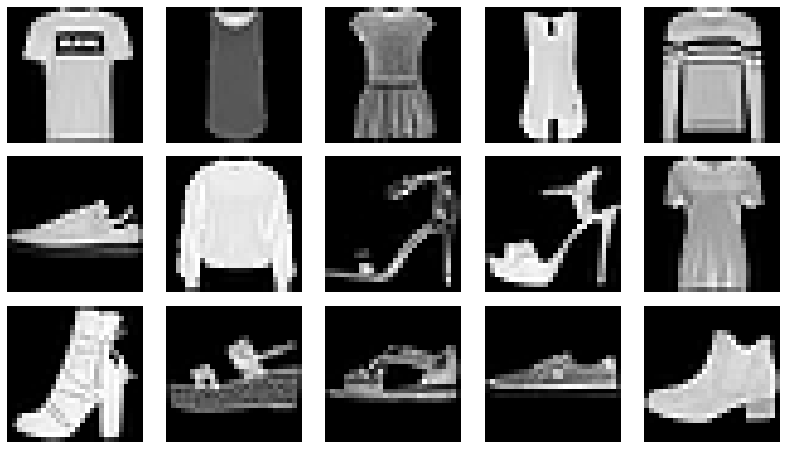

In [3]:
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.imshow(np.reshape(X_train[i], (28,28)), cmap="gray")
    plt.axis('off')
    
plt.show()



## Define Generator

In [ ]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return generator

## Define Discriminator

In [ ]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return discriminator

## Combine to create GAN

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap="gray")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Training Phase






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1










100%|██████████| 128/128 [00:09<00:00, 13.92it/s]


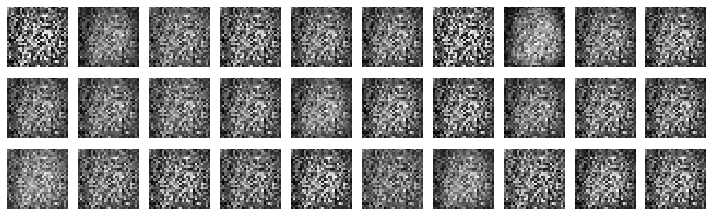

  3%|▎         | 4/128 [00:00<00:03, 35.93it/s]

Epoch 2


  4%|▍         | 5/128 [00:00<00:02, 45.44it/s]

Epoch 3


  4%|▍         | 5/128 [00:00<00:02, 44.27it/s]

Epoch 4


  4%|▍         | 5/128 [00:00<00:02, 41.86it/s]

Epoch 5


  4%|▍         | 5/128 [00:00<00:02, 44.62it/s]

Epoch 6


  4%|▍         | 5/128 [00:00<00:02, 44.19it/s]

Epoch 7


  4%|▍         | 5/128 [00:00<00:02, 45.59it/s]

Epoch 8


  4%|▍         | 5/128 [00:00<00:02, 43.51it/s]

Epoch 9


  4%|▍         | 5/128 [00:00<00:02, 43.58it/s]

Epoch 10


100%|██████████| 128/128 [00:02<00:00, 42.84it/s]


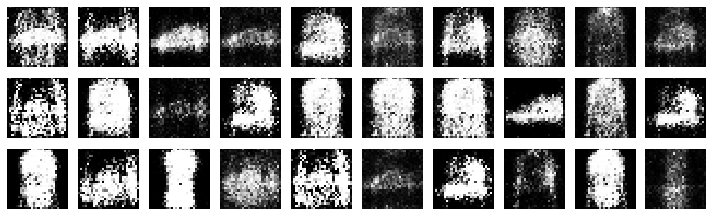

  3%|▎         | 4/128 [00:00<00:03, 39.43it/s]

Epoch 11


  4%|▍         | 5/128 [00:00<00:02, 44.63it/s]

Epoch 12


  3%|▎         | 4/128 [00:00<00:03, 37.97it/s]

Epoch 13


  4%|▍         | 5/128 [00:00<00:02, 43.86it/s]

Epoch 14


  4%|▍         | 5/128 [00:00<00:02, 42.80it/s]

Epoch 15


  4%|▍         | 5/128 [00:00<00:02, 44.75it/s]

Epoch 16


  4%|▍         | 5/128 [00:00<00:02, 44.38it/s]

Epoch 17


  4%|▍         | 5/128 [00:00<00:02, 44.51it/s]

Epoch 18


  4%|▍         | 5/128 [00:00<00:02, 42.60it/s]

Epoch 19


  4%|▍         | 5/128 [00:00<00:02, 42.75it/s]

Epoch 20


100%|██████████| 128/128 [00:02<00:00, 42.93it/s]


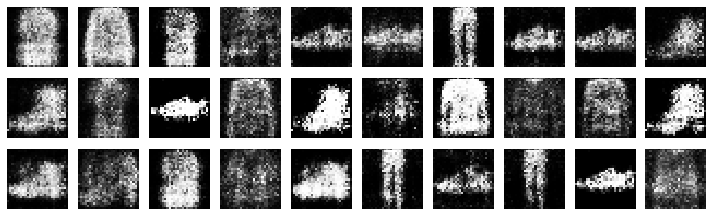

  4%|▍         | 5/128 [00:00<00:02, 41.04it/s]

Epoch 21


  4%|▍         | 5/128 [00:00<00:03, 40.60it/s]

Epoch 22


  4%|▍         | 5/128 [00:00<00:02, 42.92it/s]

Epoch 23


  3%|▎         | 4/128 [00:00<00:03, 38.34it/s]

Epoch 24


  4%|▍         | 5/128 [00:00<00:02, 43.87it/s]

Epoch 25


  4%|▍         | 5/128 [00:00<00:02, 43.85it/s]

Epoch 26


  4%|▍         | 5/128 [00:00<00:02, 41.19it/s]

Epoch 27


  4%|▍         | 5/128 [00:00<00:02, 41.26it/s]

Epoch 28


  4%|▍         | 5/128 [00:00<00:02, 41.11it/s]

Epoch 29


  4%|▍         | 5/128 [00:00<00:02, 42.78it/s]

Epoch 30


100%|██████████| 128/128 [00:02<00:00, 42.78it/s]


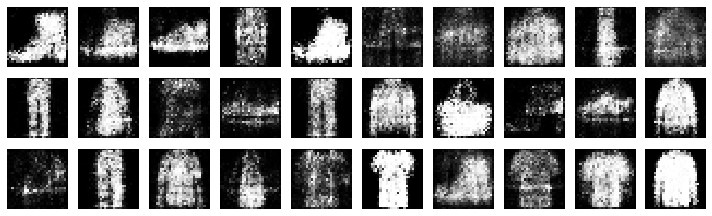

  3%|▎         | 4/128 [00:00<00:03, 38.79it/s]

Epoch 31


  4%|▍         | 5/128 [00:00<00:02, 44.25it/s]

Epoch 32


  4%|▍         | 5/128 [00:00<00:02, 42.97it/s]

Epoch 33


  4%|▍         | 5/128 [00:00<00:02, 42.23it/s]

Epoch 34


  4%|▍         | 5/128 [00:00<00:02, 44.10it/s]

Epoch 35


  4%|▍         | 5/128 [00:00<00:02, 42.87it/s]

Epoch 36


  4%|▍         | 5/128 [00:00<00:02, 42.06it/s]

Epoch 37


  4%|▍         | 5/128 [00:00<00:02, 43.88it/s]

Epoch 38


  4%|▍         | 5/128 [00:00<00:02, 43.96it/s]

Epoch 39


  4%|▍         | 5/128 [00:00<00:02, 44.32it/s]

Epoch 40


100%|██████████| 128/128 [00:02<00:00, 42.74it/s]


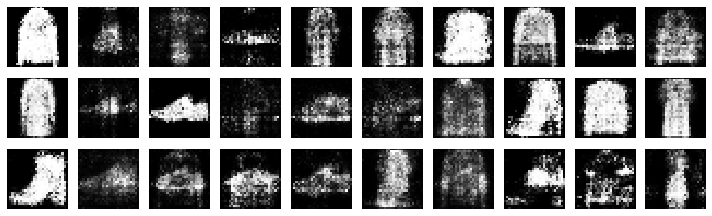

  3%|▎         | 4/128 [00:00<00:03, 38.68it/s]

Epoch 41


  4%|▍         | 5/128 [00:00<00:02, 44.02it/s]

Epoch 42


  4%|▍         | 5/128 [00:00<00:02, 43.67it/s]

Epoch 43


  4%|▍         | 5/128 [00:00<00:02, 43.19it/s]

Epoch 44


  4%|▍         | 5/128 [00:00<00:02, 41.78it/s]

Epoch 45


  4%|▍         | 5/128 [00:00<00:03, 40.81it/s]

Epoch 46


  4%|▍         | 5/128 [00:00<00:02, 41.48it/s]

Epoch 47


  4%|▍         | 5/128 [00:00<00:02, 44.67it/s]

Epoch 48


  4%|▍         | 5/128 [00:00<00:02, 44.70it/s]

Epoch 49


  4%|▍         | 5/128 [00:00<00:02, 43.80it/s]

Epoch 50


100%|██████████| 128/128 [00:02<00:00, 43.32it/s]


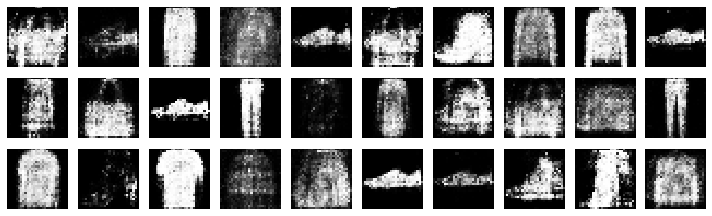

  4%|▍         | 5/128 [00:00<00:02, 42.10it/s]

Epoch 51


  4%|▍         | 5/128 [00:00<00:02, 43.18it/s]

Epoch 52


  4%|▍         | 5/128 [00:00<00:02, 44.06it/s]

Epoch 53


  4%|▍         | 5/128 [00:00<00:02, 41.98it/s]

Epoch 54


  4%|▍         | 5/128 [00:00<00:02, 45.10it/s]

Epoch 55


  4%|▍         | 5/128 [00:00<00:02, 42.34it/s]

Epoch 56


  4%|▍         | 5/128 [00:00<00:02, 43.18it/s]

Epoch 57


  4%|▍         | 5/128 [00:00<00:02, 44.22it/s]

Epoch 58


  4%|▍         | 5/128 [00:00<00:02, 44.39it/s]

Epoch 59


  4%|▍         | 5/128 [00:00<00:02, 43.41it/s]

Epoch 60


100%|██████████| 128/128 [00:03<00:00, 42.09it/s]


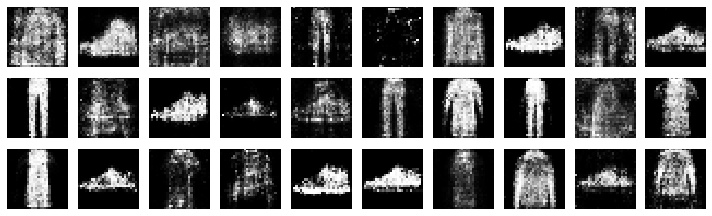

  3%|▎         | 4/128 [00:00<00:03, 37.56it/s]

Epoch 61


  4%|▍         | 5/128 [00:00<00:02, 43.10it/s]

Epoch 62


  4%|▍         | 5/128 [00:00<00:02, 43.44it/s]

Epoch 63


  4%|▍         | 5/128 [00:00<00:02, 41.76it/s]

Epoch 64


  3%|▎         | 4/128 [00:00<00:03, 38.81it/s]

Epoch 65


  4%|▍         | 5/128 [00:00<00:03, 40.13it/s]

Epoch 66


  4%|▍         | 5/128 [00:00<00:02, 43.09it/s]

Epoch 67


  4%|▍         | 5/128 [00:00<00:02, 42.89it/s]

Epoch 68


  4%|▍         | 5/128 [00:00<00:02, 42.59it/s]

Epoch 69


  4%|▍         | 5/128 [00:00<00:02, 43.23it/s]

Epoch 70


100%|██████████| 128/128 [00:03<00:00, 42.08it/s]


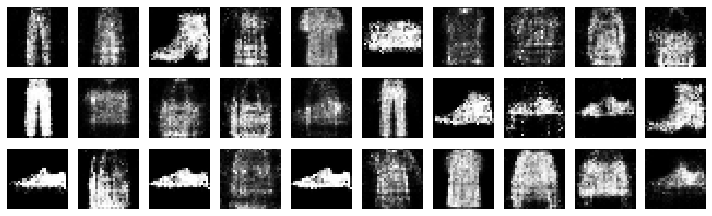

  3%|▎         | 4/128 [00:00<00:03, 38.21it/s]

Epoch 71


  4%|▍         | 5/128 [00:00<00:02, 42.67it/s]

Epoch 72


  4%|▍         | 5/128 [00:00<00:02, 44.24it/s]

Epoch 73


  4%|▍         | 5/128 [00:00<00:02, 43.32it/s]

Epoch 74


  4%|▍         | 5/128 [00:00<00:02, 43.18it/s]

Epoch 75


  4%|▍         | 5/128 [00:00<00:02, 43.50it/s]

Epoch 76


  4%|▍         | 5/128 [00:00<00:02, 44.14it/s]

Epoch 77


  4%|▍         | 5/128 [00:00<00:02, 42.29it/s]

Epoch 78


  4%|▍         | 5/128 [00:00<00:02, 42.32it/s]

Epoch 79


  4%|▍         | 5/128 [00:00<00:03, 40.91it/s]

Epoch 80


100%|██████████| 128/128 [00:03<00:00, 42.12it/s]


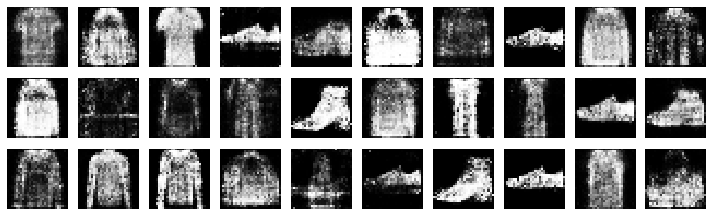

  3%|▎         | 4/128 [00:00<00:03, 37.35it/s]

Epoch 81


  4%|▍         | 5/128 [00:00<00:02, 43.54it/s]

Epoch 82


  4%|▍         | 5/128 [00:00<00:02, 41.26it/s]

Epoch 83


  4%|▍         | 5/128 [00:00<00:02, 43.64it/s]

Epoch 84


  4%|▍         | 5/128 [00:00<00:02, 43.21it/s]

Epoch 85


  4%|▍         | 5/128 [00:00<00:02, 43.40it/s]

Epoch 86


  4%|▍         | 5/128 [00:00<00:02, 42.35it/s]

Epoch 87


  4%|▍         | 5/128 [00:00<00:02, 42.88it/s]

Epoch 88


  4%|▍         | 5/128 [00:00<00:02, 42.31it/s]

Epoch 89


  4%|▍         | 5/128 [00:00<00:02, 42.87it/s]

Epoch 90


100%|██████████| 128/128 [00:03<00:00, 41.59it/s]


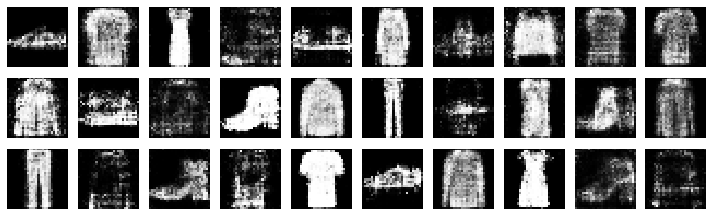

  3%|▎         | 4/128 [00:00<00:03, 39.34it/s]

Epoch 91


  4%|▍         | 5/128 [00:00<00:02, 44.09it/s]

Epoch 92


  4%|▍         | 5/128 [00:00<00:02, 43.92it/s]

Epoch 93


  4%|▍         | 5/128 [00:00<00:02, 41.70it/s]

Epoch 94


  4%|▍         | 5/128 [00:00<00:02, 43.40it/s]

Epoch 95


  4%|▍         | 5/128 [00:00<00:02, 43.45it/s]

Epoch 96


  4%|▍         | 5/128 [00:00<00:02, 44.89it/s]

Epoch 97


  3%|▎         | 4/128 [00:00<00:03, 40.00it/s]

Epoch 98


  4%|▍         | 5/128 [00:00<00:03, 40.97it/s]

Epoch 99


  4%|▍         | 5/128 [00:00<00:02, 42.17it/s]

Epoch 100


100%|██████████| 128/128 [00:02<00:00, 42.74it/s]


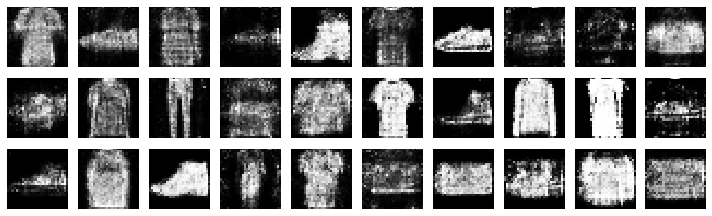

  4%|▍         | 5/128 [00:00<00:02, 42.06it/s]

Epoch 101


  4%|▍         | 5/128 [00:00<00:02, 43.71it/s]

Epoch 102


  4%|▍         | 5/128 [00:00<00:02, 42.01it/s]

Epoch 103


  4%|▍         | 5/128 [00:00<00:03, 40.04it/s]

Epoch 104


  4%|▍         | 5/128 [00:00<00:02, 43.60it/s]

Epoch 105


  4%|▍         | 5/128 [00:00<00:02, 44.23it/s]

Epoch 106


  4%|▍         | 5/128 [00:00<00:02, 43.36it/s]

Epoch 107


  4%|▍         | 5/128 [00:00<00:02, 43.37it/s]

Epoch 108


  3%|▎         | 4/128 [00:00<00:03, 39.87it/s]

Epoch 109


  4%|▍         | 5/128 [00:00<00:02, 42.38it/s]

Epoch 110


100%|██████████| 128/128 [00:03<00:00, 41.37it/s]


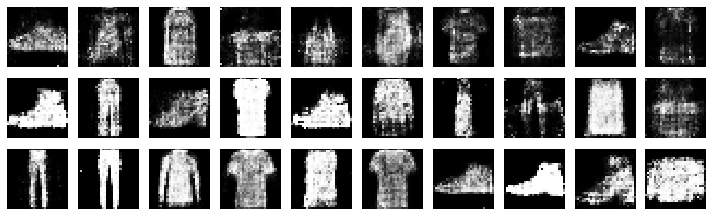

  3%|▎         | 4/128 [00:00<00:03, 34.56it/s]

Epoch 111


  4%|▍         | 5/128 [00:00<00:02, 43.46it/s]

Epoch 112


  4%|▍         | 5/128 [00:00<00:02, 41.65it/s]

Epoch 113


  4%|▍         | 5/128 [00:00<00:02, 42.20it/s]

Epoch 114


  4%|▍         | 5/128 [00:00<00:02, 42.86it/s]

Epoch 115


  4%|▍         | 5/128 [00:00<00:02, 44.92it/s]

Epoch 116


  4%|▍         | 5/128 [00:00<00:02, 44.29it/s]

Epoch 117


  4%|▍         | 5/128 [00:00<00:02, 43.88it/s]

Epoch 118


  4%|▍         | 5/128 [00:00<00:02, 41.33it/s]

Epoch 119


  4%|▍         | 5/128 [00:00<00:02, 41.10it/s]

Epoch 120


100%|██████████| 128/128 [00:03<00:00, 41.77it/s]


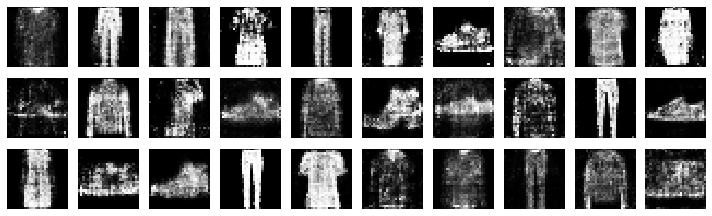

  3%|▎         | 4/128 [00:00<00:03, 37.18it/s]

Epoch 121


  3%|▎         | 4/128 [00:00<00:03, 38.98it/s]

Epoch 122


  3%|▎         | 4/128 [00:00<00:03, 37.36it/s]

Epoch 123


  4%|▍         | 5/128 [00:00<00:03, 40.77it/s]

Epoch 124


  4%|▍         | 5/128 [00:00<00:02, 43.83it/s]

Epoch 125


  4%|▍         | 5/128 [00:00<00:02, 44.08it/s]

Epoch 126


  4%|▍         | 5/128 [00:00<00:02, 42.23it/s]

Epoch 127


  4%|▍         | 5/128 [00:00<00:02, 44.05it/s]

Epoch 128


  4%|▍         | 5/128 [00:00<00:02, 42.94it/s]

Epoch 129


  4%|▍         | 5/128 [00:00<00:02, 43.92it/s]

Epoch 130


100%|██████████| 128/128 [00:03<00:00, 42.56it/s]


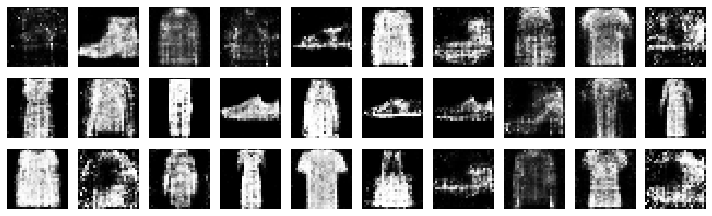

  3%|▎         | 4/128 [00:00<00:03, 36.03it/s]

Epoch 131


  4%|▍         | 5/128 [00:00<00:02, 45.83it/s]

Epoch 132


  4%|▍         | 5/128 [00:00<00:02, 43.37it/s]

Epoch 133


  4%|▍         | 5/128 [00:00<00:02, 43.97it/s]

Epoch 134


  4%|▍         | 5/128 [00:00<00:02, 43.36it/s]

Epoch 135


  4%|▍         | 5/128 [00:00<00:02, 43.37it/s]

Epoch 136


  4%|▍         | 5/128 [00:00<00:02, 43.00it/s]

Epoch 137


  4%|▍         | 5/128 [00:00<00:02, 43.72it/s]

Epoch 138


  4%|▍         | 5/128 [00:00<00:02, 42.20it/s]

Epoch 139


  4%|▍         | 5/128 [00:00<00:02, 44.67it/s]

Epoch 140


100%|██████████| 128/128 [00:03<00:00, 42.45it/s]


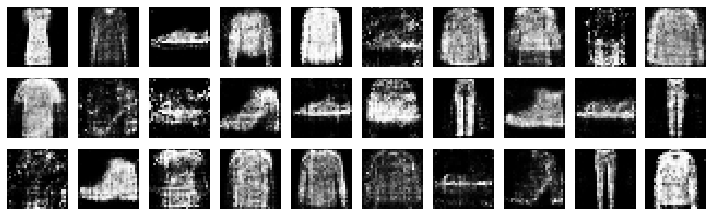

  3%|▎         | 4/128 [00:00<00:03, 34.83it/s]

Epoch 141


  4%|▍         | 5/128 [00:00<00:02, 44.52it/s]

Epoch 142


  4%|▍         | 5/128 [00:00<00:02, 44.47it/s]

Epoch 143


  3%|▎         | 4/128 [00:00<00:03, 39.81it/s]

Epoch 144


  4%|▍         | 5/128 [00:00<00:03, 39.99it/s]

Epoch 145


  4%|▍         | 5/128 [00:00<00:02, 45.63it/s]

Epoch 146


  4%|▍         | 5/128 [00:00<00:02, 43.07it/s]

Epoch 147


  4%|▍         | 5/128 [00:00<00:02, 43.54it/s]

Epoch 148


  4%|▍         | 5/128 [00:00<00:02, 44.18it/s]

Epoch 149


  4%|▍         | 5/128 [00:00<00:02, 44.69it/s]

Epoch 150


100%|██████████| 128/128 [00:03<00:00, 42.53it/s]


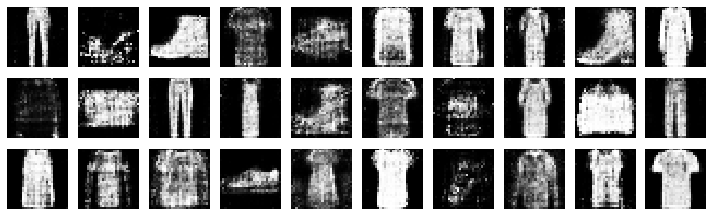

  3%|▎         | 4/128 [00:00<00:03, 39.46it/s]

Epoch 151


  4%|▍         | 5/128 [00:00<00:02, 44.08it/s]

Epoch 152


  4%|▍         | 5/128 [00:00<00:02, 43.58it/s]

Epoch 153


  4%|▍         | 5/128 [00:00<00:02, 42.90it/s]

Epoch 154


  4%|▍         | 5/128 [00:00<00:02, 44.16it/s]

Epoch 155


  4%|▍         | 5/128 [00:00<00:02, 44.64it/s]

Epoch 156


  3%|▎         | 4/128 [00:00<00:03, 38.52it/s]

Epoch 157


  4%|▍         | 5/128 [00:00<00:02, 43.79it/s]

Epoch 158


  4%|▍         | 5/128 [00:00<00:02, 45.49it/s]

Epoch 159


  3%|▎         | 4/128 [00:00<00:03, 39.80it/s]

Epoch 160


100%|██████████| 128/128 [00:03<00:00, 41.85it/s]


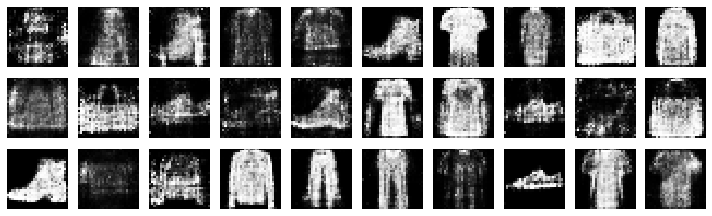

  3%|▎         | 4/128 [00:00<00:03, 39.28it/s]

Epoch 161


  4%|▍         | 5/128 [00:00<00:02, 43.21it/s]

Epoch 162


  4%|▍         | 5/128 [00:00<00:02, 42.93it/s]

Epoch 163


  4%|▍         | 5/128 [00:00<00:02, 44.72it/s]

Epoch 164


  4%|▍         | 5/128 [00:00<00:02, 44.06it/s]

Epoch 165


  4%|▍         | 5/128 [00:00<00:02, 43.53it/s]

Epoch 166


  4%|▍         | 5/128 [00:00<00:02, 43.91it/s]

Epoch 167


  4%|▍         | 5/128 [00:00<00:02, 42.30it/s]

Epoch 168


  4%|▍         | 5/128 [00:00<00:03, 40.81it/s]

Epoch 169


  4%|▍         | 5/128 [00:00<00:02, 44.12it/s]

Epoch 170


100%|██████████| 128/128 [00:02<00:00, 42.88it/s]


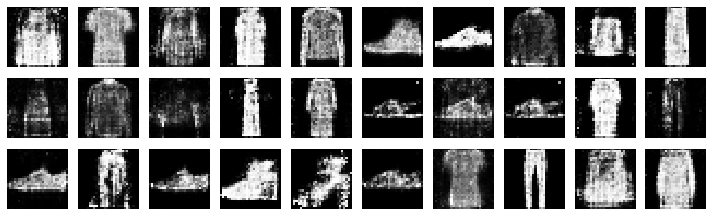

  3%|▎         | 4/128 [00:00<00:03, 39.07it/s]

Epoch 171


  4%|▍         | 5/128 [00:00<00:02, 44.17it/s]

Epoch 172


  4%|▍         | 5/128 [00:00<00:02, 44.92it/s]

Epoch 173


  4%|▍         | 5/128 [00:00<00:02, 43.12it/s]

Epoch 174


  4%|▍         | 5/128 [00:00<00:02, 45.76it/s]

Epoch 175


  4%|▍         | 5/128 [00:00<00:02, 43.40it/s]

Epoch 176


  4%|▍         | 5/128 [00:00<00:02, 44.07it/s]

Epoch 177


  4%|▍         | 5/128 [00:00<00:02, 44.80it/s]

Epoch 178


  4%|▍         | 5/128 [00:00<00:02, 42.39it/s]

Epoch 179


  4%|▍         | 5/128 [00:00<00:02, 42.93it/s]

Epoch 180


100%|██████████| 128/128 [00:03<00:00, 42.36it/s]


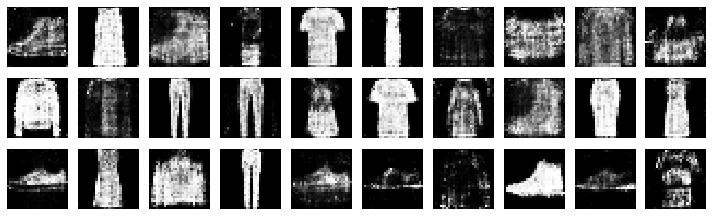

  3%|▎         | 4/128 [00:00<00:03, 37.79it/s]

Epoch 181


  4%|▍         | 5/128 [00:00<00:02, 44.77it/s]

Epoch 182


  4%|▍         | 5/128 [00:00<00:02, 44.72it/s]

Epoch 183


  3%|▎         | 4/128 [00:00<00:03, 38.49it/s]

Epoch 184


  4%|▍         | 5/128 [00:00<00:02, 44.84it/s]

Epoch 185


  4%|▍         | 5/128 [00:00<00:02, 44.26it/s]

Epoch 186


  3%|▎         | 4/128 [00:00<00:03, 38.72it/s]

Epoch 187


  4%|▍         | 5/128 [00:00<00:02, 44.31it/s]

Epoch 188


  4%|▍         | 5/128 [00:00<00:02, 43.49it/s]

Epoch 189


  4%|▍         | 5/128 [00:00<00:02, 45.53it/s]

Epoch 190


100%|██████████| 128/128 [00:03<00:00, 42.59it/s]


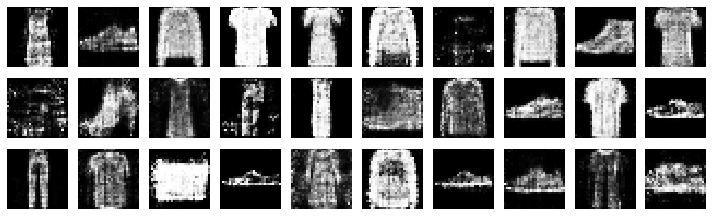

  3%|▎         | 4/128 [00:00<00:03, 39.12it/s]

Epoch 191


  4%|▍         | 5/128 [00:00<00:02, 42.99it/s]

Epoch 192


  4%|▍         | 5/128 [00:00<00:02, 42.18it/s]

Epoch 193


  4%|▍         | 5/128 [00:00<00:02, 43.51it/s]

Epoch 194


  4%|▍         | 5/128 [00:00<00:02, 45.21it/s]

Epoch 195


  4%|▍         | 5/128 [00:00<00:02, 43.93it/s]

Epoch 196


  4%|▍         | 5/128 [00:00<00:02, 43.11it/s]

Epoch 197


  4%|▍         | 5/128 [00:00<00:02, 44.08it/s]

Epoch 198


  4%|▍         | 5/128 [00:00<00:02, 43.97it/s]

Epoch 199


  4%|▍         | 5/128 [00:00<00:02, 43.03it/s]

Epoch 200


100%|██████████| 128/128 [00:02<00:00, 42.83it/s]


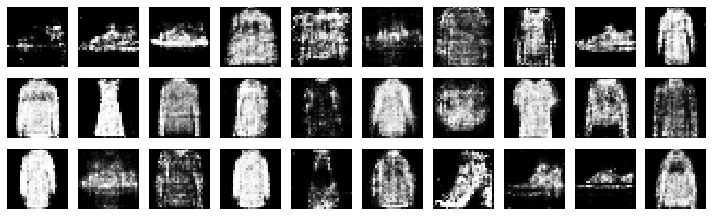

In [8]:
epochs = 200
batch_size = 128

batch_count = X_train.shape[0] / batch_size

# Creating GAN
generator= create_generator()
discriminator= create_discriminator()
gan = create_gan(discriminator, generator)

for e in range(1,epochs+1 ):
    print("Epoch %d" %e)
    for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
        noise = np.random.normal(0,1, [batch_size, 100])

        # Generate fake MNIST images from noised input
        generated_images = generator.predict(noise)

        # Get a random set of  real images
        image_batch = X_train[np.random.randint(low=0, high=X_train.shape[0], size=batch_size)]

        #Construct different batches of  real and fake data 
        X = np.concatenate([image_batch, generated_images])

        # Labels for generated and real data
        y_dis = np.zeros(2 * batch_size)
        y_dis[:batch_size] = 0.9

        #Pre train discriminator on  fake and real data  before starting the gan. 
        discriminator.trainable = True
        discriminator.train_on_batch(X, y_dis)

        #Tricking the noised input of the Generator as real data
        noise = np.random.normal(0,1, [batch_size, 100])
        y_gen = np.ones(batch_size)

        # During the training of gan, 
        # the weights of discriminator should be fixed. 
        #We can enforce that by setting the trainable flag
        discriminator.trainable = False

        #training  the GAN by alternating the training of the Discriminator 
        #and training the chained GAN model with Discriminator’s weights freezed.
        gan.train_on_batch(noise, y_gen)
    
    if e==1 or e % 10 == 0:
        plot_generated_images(e, generator, examples=30)
        



## Examples

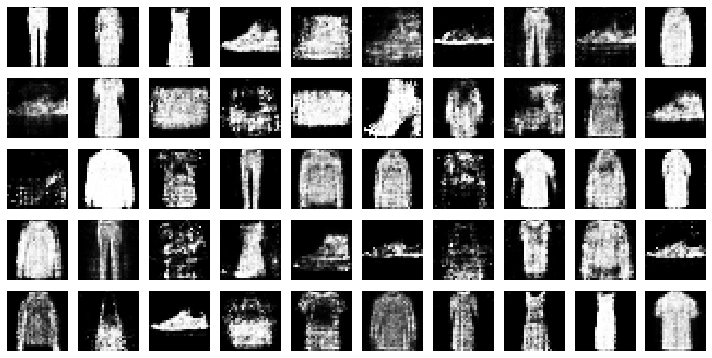

In [13]:
plot_generated_images(10, generator, examples=50)

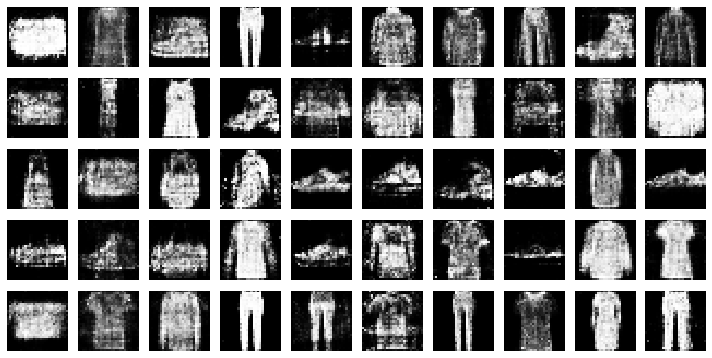

In [11]:
plot_generated_images(10, generator, examples=50)
